Задание.
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
1. Загрузите файл HR.csv в pandas dataframe.
2. Рассчитайте основные статистики для переменных.
3. Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом
департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.
7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.
8. Рассчитать показатели среди уволившихся и не
уволившихся сотрудников.
9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов.
Оценить качество модели на тестовой выборки.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*1. Загрузка файла HR.csv*

In [ ]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
hr.duplicated().sum()

3008

In [ ]:
hr.drop_duplicates(inplace=True)

In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


В данных отсутствуют пропуски. Типы данных указаны также корректно. Все дубликаты (3008 строк) были удалены.

*2. Основные статистики для переменных*

In [ ]:
stat_hr = hr.describe()
stat_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Дополнительно рассчитаем значения медианы для числовых столбцов:

In [ ]:
median = (pd.DataFrame(hr.median(numeric_only=True))).T
median

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.66,0.72,4.0,200.0,3.0,0.0,0.0,0.0


Также рассчитаем значения мод для всех столбцов:

In [ ]:
modes = (pd.DataFrame(hr.apply(lambda x: x.mode()[0])).T)
modes

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.74,0.55,4,149,3,0,0,0,sales,low


Все данные в датафрейме адекватны, нет отрицательных значений, данные не выходят за пределы значений по столбцам, т.е. нелогичных выбросов нет.

*3. Корреляционная матрица*

In [ ]:
#для матрицы корреляций оставляем только числовые столбцы. Используем корр. Спирмена, тк данные не распределены нормально
hr_corr = hr.drop(['department', 'salary'], axis= 1 )
hr_corr.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.139972,-0.000679,0.061647,-0.162049,0.036668,-0.318436,0.016499
last_evaluation,0.139972,1.000000,0.267199,0.265949,0.110306,-0.004792,0.005765,-0.006012
number_project,-0.000679,0.267199,1.000000,0.310578,0.214167,-0.000930,-0.008000,0.001616
average_montly_hours,0.061647,0.265949,0.310578,1.000000,0.122229,-0.009513,0.047631,-0.004631
time_spend_company,-0.162049,0.110306,0.214167,0.122229,1.000000,-0.019088,0.259352,0.027375
Work_accident,0.036668,-0.004792,-0.000930,-0.009513,-0.019088,1.000000,-0.125436,0.029852
left,-0.318436,0.005765,-0.008000,0.047631,0.259352,-0.125436,1.000000,-0.044657
promotion_last_5years,0.016499,-0.006012,0.001616,-0.004631,0.027375,0.029852,-0.044657,1.000000


<Axes: >

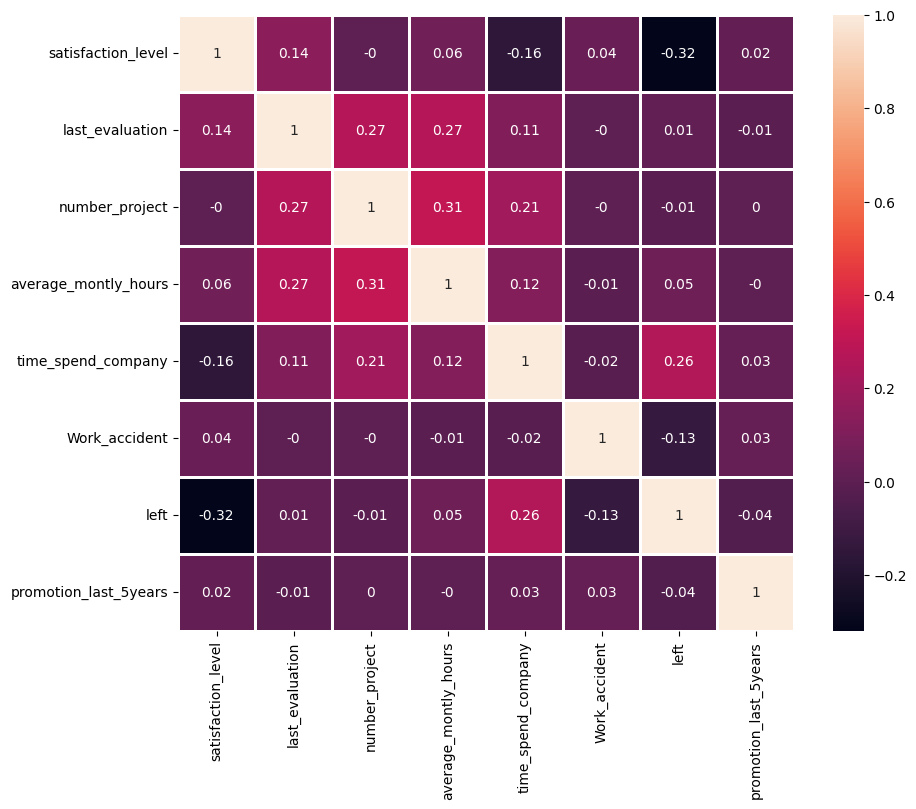

In [ ]:
plt.figure(figsize= (10, 8))
sns.heatmap(hr_corr.corr(method='spearman').round(2), annot = True, square = True, linewidths=1)

Можно заметить, что сильной корреляции совсем не наблюдается.
Самые скоррелированные переменные:
*   Средняя положительная корреляция между количеством проектов и среднем кол-ве часов на рабочем месте в месяц, т.е. чем дольше сотрудник работает, тем больше проектов он успевает выполнить.
*   Средняя отрицательная корреляция между фактом увольнения и уровнем удовлетворенностью работой, т.е. чем недовольнее сотрудник, тем с бОльшей вероятностью он уволится.

Наименее скоррелированные переменные:
*   Линейной зависимости нет между данными времени с последней проверки и наличием несчастных случаев у сотрудника.
*   Линейной зависимости нет между данными о несчастных случаях с сотрудником и количеством выполненных проектов.
*   Линейной зависимости нет между данными о повышении сотрудника за последние 5 лет, средним количеством часов на рабочем месте в месяц и количеством проектов










*4. Количество сотрудников в каждом департаменте*

In [ ]:
#учитываем только сотрудников, которые работают на данный момент
hr2 = hr[hr['left'] == 0]['department'].value_counts().sort_values(ascending=False)
hr2

sales          2689
technical      1854
support        1509
IT              818
RandD           609
product_mng     576
marketing       561
accounting      512
hr              488
management      384
Name: department, dtype: int64

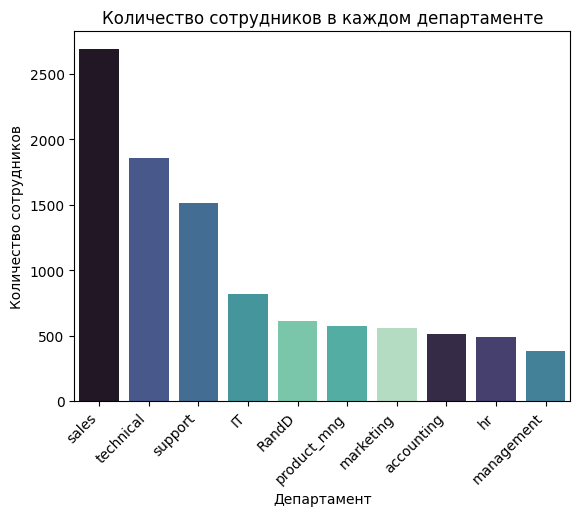

In [ ]:
hr_counts = hr2.index
sns.countplot(data=hr[hr['left'] == 0], x="department", hue="department", palette= "mako", order=hr_counts)
plt.title("Количество сотрудников в каждом департаменте")
plt.ylabel("Количество сотрудников")
plt.xlabel("Департамент")
plt.xticks(rotation=45, ha='right')
plt.show()

Самым многочисленным является отдел продаж  (2689 сотрудников), самым малочисленным — отдел менеджмента (384 сотрудника)

*5. Распределение сотрудников по зарплатам*

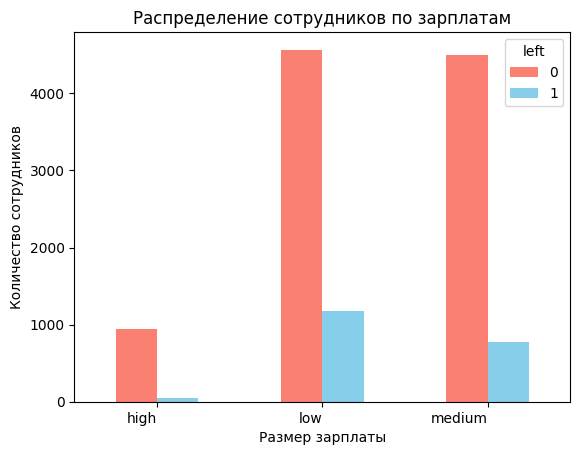

In [ ]:
#здесь отдельно разносим данные для уволившихся и работающим сотрудников
salary_hr = hr.groupby(['salary', 'left']).size().unstack()
salary_hr.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Распределение сотрудников по зарплатам")
plt.ylabel("Количество сотрудников")
plt.xlabel("Размер зарплаты")
plt.xticks(rotation=0, ha='right')
plt.show()

Из распределения видно, что количество работающих с низкой и средней зарплатой практически одинаково, но при этом уволилось больше людей, получавших низкую зарплату.
Хоть и люди с высокой зарплатой - самая малочисленная категория (~ 1000 сотрудников), но количество уволившихся меньше, чем в других категориях, в 10-15 раз

*6. Распределение по зарплатам в каждом департаменте*

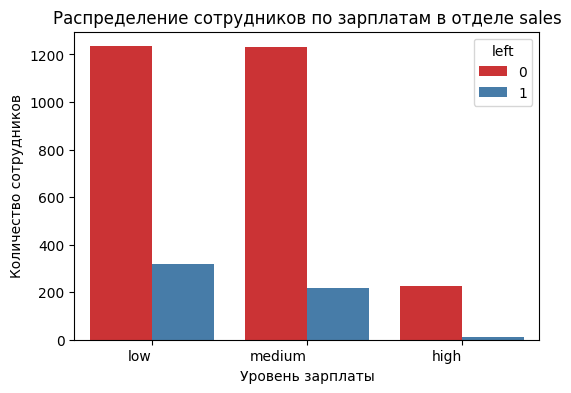

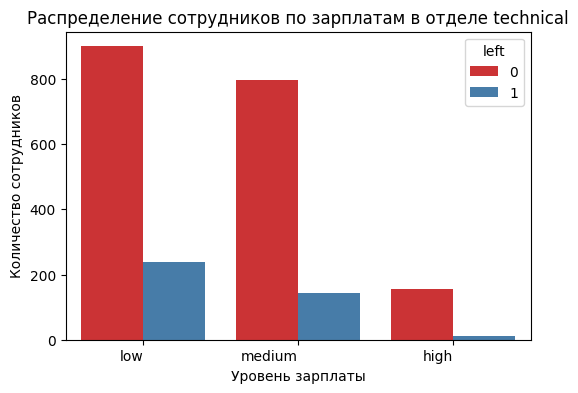

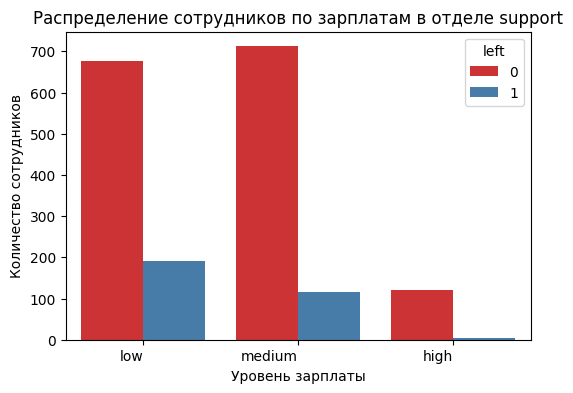

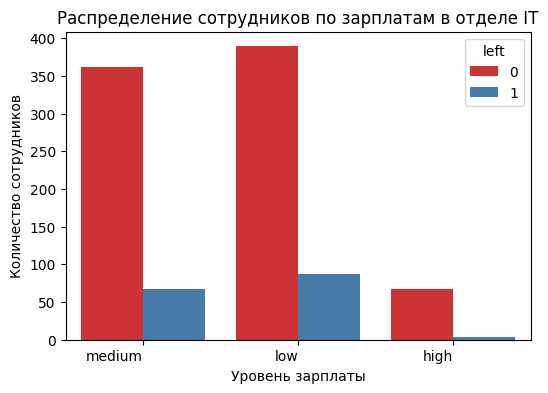

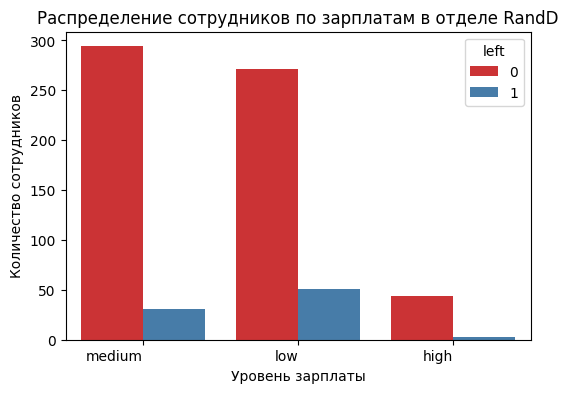

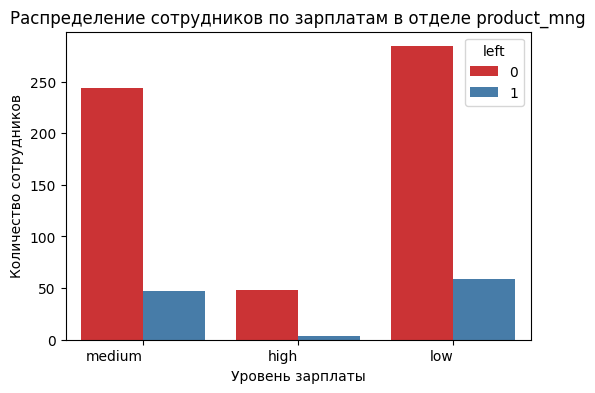

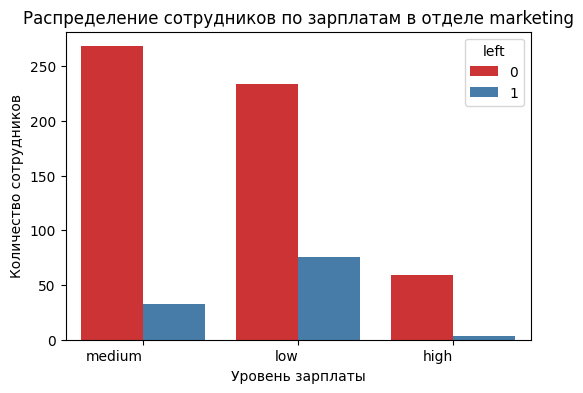

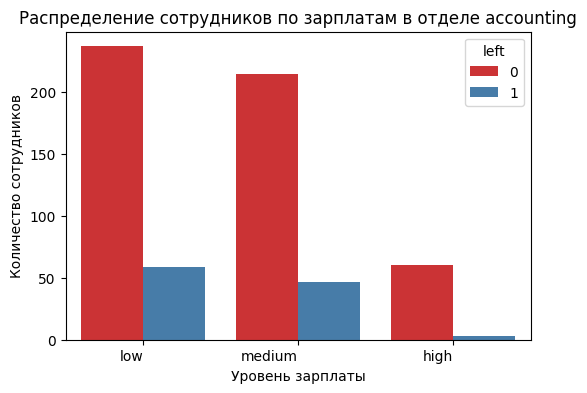

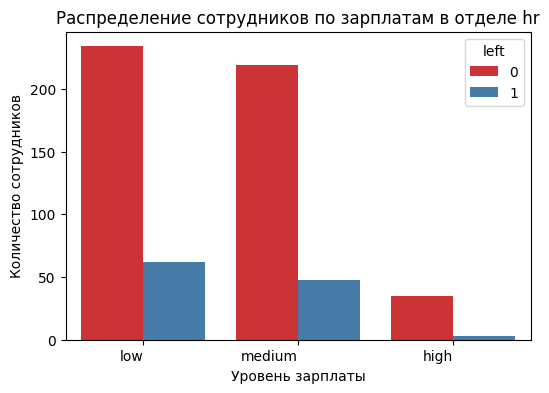

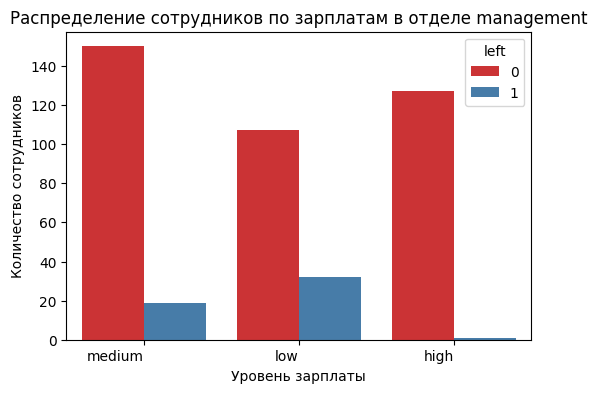

In [ ]:
dep_list = hr['department'].value_counts().index.tolist()
for department in dep_list:
  plt.figure(figsize=(6,4))
  sns.countplot(data=hr[hr['department'] == department], x='salary', hue='left', palette='Set1')
  plt.title(f"Распределение сотрудников по зарплатам в отделе {department}")
  plt.ylabel("Количество сотрудников")
  plt.xlabel("Уровень зарплаты")
  plt.xticks(rotation=0, ha='right')
  plt.show()



По результатам построения распределений можно сделать вывод о том, что:
*   среди работающих большинство получают низкую зарплату в отделах technical, IT, product_mng, accounting, hr, в остальных отделах большинство получают среднюю зарплату.
*   больше всего уволилось сотрудников из отделов sales, technical,  support (> 200), все они получали низкую зарплату.
*   в отделе management работает больше сотрудников, получающих высокую зарплату, чем получающих низкую.




*7. Проверка гипотезы о том, что сотрудники с высоким окладом проводят на работе больше времени*

In [ ]:
from scipy import stats
from scipy.stats import shapiro

In [ ]:
low_salary = hr[hr['salary'] == 'low']['average_montly_hours']
high_salary = hr[hr['salary'] == 'high']['average_montly_hours']

Выдвигаем гипотезы:

Н0: Среднее время, проведенное на работе, у сотрудников с высокой зарплатой равно среднему времени у сотрудников с низкой зарплатой.

Н1: Среднее время, проведенное на работе, у сотрудников с высокой зарплатой отличается от среднего времени у сотрудников с низкой зарплатой.

Для применения t-теста Стьюдента необходимо убедиться в том, что данные распределены нормально, а также убедиться в равенстве дисперсий.

In [ ]:
def check_normality(data, alpha):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%f' % (stat, p))
    if p < alpha:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
check_normality(high_salary, 0.05)

Statistics=0.973, p=0.000000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
check_normality(low_salary, 0.05)

Statistics=0.968, p=0.000000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


Так как данные распределенны не нормально, нельзя использовать t-критерий Стьюдента. Поэтому используем тест Манна-Уитни

In [ ]:
stat, p = stats.mannwhitneyu(high_salary, low_salary, alternative='two-sided')
print('Statistics=%.3f, p=%f' % (stat, p))
if p < 0.05:
    print("Отклоняем нулевую гипотезу >> Среднее время на работе у сотрудников с низкой и высокой зарплатой отличается значительно")
else:
    print("Не отклоняем нулевую гипотезу >> Среднее время на работе у сотрудников с низкой и высокой зарплатой одинаково или отличается незначительно")

Statistics=2848437.000, p=0.899410
Не отклоняем нулевую гипотезу >> Среднее время на работе у сотрудников с низкой и высокой зарплатой одинаково или отличается незначительно


В результате получаем, что сотрудники с высоким окладом проводят на работе столько же времени (или незначительно больше/меньше), сколько и сотрудники с низким окладом

*8. Расчет показателей среди уволившихся и неуволившихся сотрудников*

*   Доля сотрудников с повышением за последние 5 лет




In [ ]:
left_hr = hr[hr['left'] == 1]
non_left_hr = hr[hr['left'] == 0]
#среди уволившихся доля с повышениями = людей с повышениями/общее кол-во уволившихся
promotion_left = left_hr['promotion_last_5years'].sum()/len(left_hr)
promotion_non_left = non_left_hr['promotion_last_5years'].sum()/len(non_left_hr)
print(f'Доля уволившихся сотрудников с повышением за последние 5 лет: {promotion_left:.4f}')
print(f'Доля работающих сотрудников с повышением за последние 5 лет: {promotion_non_left:.4f}')

Доля уволившихся сотрудников с повышением за последние 5 лет: 0.0040
Доля работающих сотрудников с повышением за последние 5 лет: 0.0195


В двух группах количество людей с повышениями мало, но среди уволившихся доля меньше почти в 5 раз, в сравнении с группой с работающими сотрудниками

*   Средняя степень удовлетворенности



In [ ]:
level_left = left_hr['satisfaction_level'].mean()
level_non_left = non_left_hr['satisfaction_level'].mean()
print(f'Средний уровень удовлетворенности работой у уволившихся: {level_left:.4f}')
print(f'Средний уровень удовлетворенности работой у работающих: {level_non_left:.4f}')

Средний уровень удовлетворенности работой у уволившихся: 0.4403
Средний уровень удовлетворенности работой у работающих: 0.6674


У работающих уровень удовлетворенности больше, чем у уволившихся

*   Среднее количество проектов




In [ ]:
project_left = round(left_hr['number_project'].mean())
project_non_left = round(non_left_hr['number_project'].mean())
print(f'Среднее количество проектов у уволившихся: {project_left}')
print(f'Среднее количество проектов у работающих: {project_non_left}')

Среднее количество проектов у уволившихся: 4
Среднее количество проектов у работающих: 4


Среднее количество проектов одинаково у двух групп.

*9. Построение модели LDA*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report

In [ ]:
hr_data = hr.drop(['salary', 'department', 'left'], axis=1)
hr_class = hr['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hr_data, hr_class, test_size=0.2, random_state=13, stratify=hr_class)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)

In [ ]:
result = pd.DataFrame([y_test, y_pred])

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2001
           1       0.49      0.29      0.37       398

    accuracy                           0.83      2399
   macro avg       0.68      0.62      0.64      2399
weighted avg       0.81      0.83      0.81      2399

